<a href="https://colab.research.google.com/github/jmattew/GOAT-stuff/blob/master/BulgeDiskHalo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [63]:
import astropy.units as u # import a python package to call certain units
import astropy.constants as ac # import a python package to call certain constants
import numpy as np #import numpy package which allows us to make mathematical operations in python
import matplotlib.pyplot as plt # import a python package for plotting a graph

In [64]:
def calculating_orbital_velocity(M,R): # create a function that returns the orbital velocity
     orbital_vel = np.sqrt((ac.G*M)/R) # return the value based on the function to calculate orbital velocity
     return orbital_vel


In [65]:
R_distance_from_bulge = np.arange(1,30) * u.kpc # set the radius to be value from 1-30
M_within_bulge = 1e10 * u.solMass # Note the scientific notation here to define bulge mass
V_orbital = calculating_orbital_velocity(M_within_bulge,R_distance_from_bulge) # calculate orbital velocities within the bulge
print(V_orbital.to(u.km/u.s)) # print out the orbital velocities in km/s

[207.3865297  146.64442148 119.73466875 103.69326485  92.7460756
  84.66519621  78.38474041  73.32221074  69.12884323  65.58137899
  62.52939142  59.86733437  57.51867436  55.42638148  53.54697172
  51.84663242  50.2986216   48.88147383  47.57773291  46.3730378
  45.25545097  44.21495669  43.24308072  42.33259811  41.47730594
  40.67184468  39.91155625  39.1923702   38.51071177] km / s


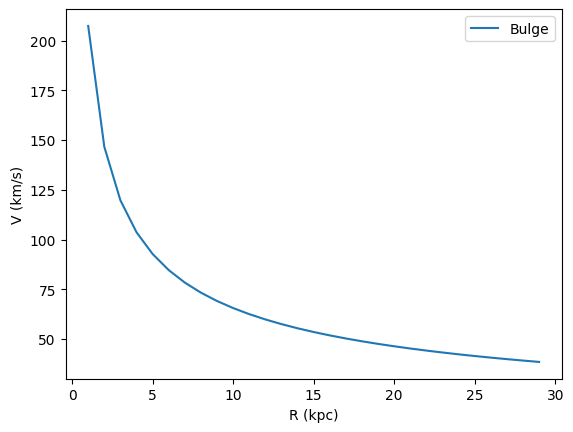

In [66]:
plt.plot(R_distance_from_bulge.to(u.kpc), V_orbital.to(u.km/u.s), label="Bulge") # plot the orbital velocity of objects at different points within the bulge
plt.xlabel('R (kpc)') # print out the x-axis label
plt.ylabel('V (km/s)') # print out the y-axis label
plt.legend() # to show the legend of a figure
# The combination of labels and legend will come handy to show differnt curves in a plot as shown in future figures.
plt.show()# show the graph
#

In [103]:
M_disk = 1.5e11 * u.solMass # Define disk total mass
R_disk = 10 * u.kpc # Define the outer edge of disk radius
density_disk = M_disk / (np.pi * (R_disk**2)) # here the density is in the unit of solar mass per square kpc, the disk is a flat cirle so volume = area = pi*r^2
print(density_disk) # print out the density of the disk

477464829.275686 solMass / kpc2


In [104]:
M_halo = 1e12 * u.solMass # Define halo total mass
R_halo = 39.5 * u.kpc # Define the outer edge of halo radius
density_halo = M_halo / ((4/3)*(np.pi * (R_halo**3))) # here the density is in the unit of solar mass per square kpc, the halo is a sphere so volume = (4/3)pi*r^3
print(density_halo) # print out the density of the halo

3873647.5554727805 solMass / kpc3


In [105]:
def calculatingEnclosedMassForDisk(R, density=477 * 1e6 * u.solMass/u.kpc**2): # Code from professor
    """
    Calculate enclosed mass for the disk component, if the radius is larger than 10 kpc, it will be truncated to 10 kpc
    Input: R - orbital radius, density - density of the disk as calculated above
    Output: M - enclosed mass
    """
    if R < 10 * u.kpc:
        M = np.pi * (R**2) * density
    else:
        R = 10 * u.kpc # any radius larger than 10 kpc will be trucated at 10 kpc because of the extent of the disk component
        M = np.pi * (R**2) * density
    return(M)

In [106]:
def calculatingEnclosedMassForHalo(R, density=3.87 * 1e6 * u.solMass/u.kpc**3):
    """
    Calculate enclosed mass for the disk component, if the radius is larger than 292 kpc, it will be truncated to 292 kpc
    Input: R - orbital radius, density - density of the disk as calculated above
    Output: M - enclosed mass
    """
    if R < 39.5 * u.kpc:
        M = (4/3) * np.pi * (R**3) * density
    else:
        R = 39.5 * u.kpc # any radius larger than 39.5 kpc will be trucated at 39.5 kpc because of the extent of the disk component
        M = (4/3) * np.pi * (R**3) * density
    return(M)

In [107]:
def calculatingEnclosedMassForMilkyWay(R, density_disk=477 * 1e6 * u.solMass/u.kpc**2, M_bulge = 1e10 * u.solMass, density=3.87 * 1e6 * u.solMass/u.kpc**3):
    """
    Calculate mass for the Milky Way, get mass of the disk component and halo component and add them together with the mass of
     the bulge component to get the total mass
    """
    M_disk = calculatingEnclosedMassForDisk(R, density=density_disk)
    M_halo = calculatingEnclosedMassForHalo(R, density=density_halo)
    M_total = M_disk + M_bulge + M_halo # get the total mass of the galaxy by adding the mass of the disk, halo and bulge together
    return(M_total)


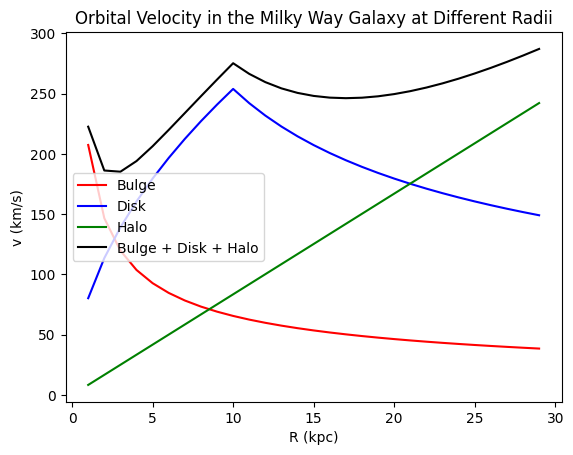

In [108]:
# redefine v_bulge_arr to avoid confusion
v_bulge_arr = calculating_orbital_velocity(M_within_bulge, R_distance_from_bulge)
# Define arrays for masses of disk, halo galaxy components to be calculated in solar masses
M_disk = np.zeros(len(R_distance_from_bulge)) * u.solMass
M_halo = np.zeros(len(R_distance_from_bulge)) * u.solMass
M_total = np.zeros(len(R_distance_from_bulge)) * u.solMass

# Actually calculating enclosed masses for the disk, halo and total component
for i in np.arange(len(R_distance_from_bulge)):
    M_disk[i] = calculatingEnclosedMassForDisk(R_distance_from_bulge[i])
    M_halo[i] = calculatingEnclosedMassForHalo(R_distance_from_bulge[i])
    M_total[i] = calculatingEnclosedMassForMilkyWay(R_distance_from_bulge[i])

# Calculating the resulting orbital velocity due to each component
v_disk_arr = calculating_orbital_velocity(M_disk, R_distance_from_bulge) # orbital velocities for disk
v_halo_arr = calculating_orbital_velocity(M_halo, R_distance_from_bulge) # orbital velocities for halo
v_bulge_disk_halo_arr = calculating_orbital_velocity(M_total, R_distance_from_bulge) # total orbital velocities


plt.plot(R_distance_from_bulge.to(u.kpc), V_orbital.to(u.km/u.s), color="red", label="Bulge") # note that here we can add label to the rotation curve caused by the Bulge
plt.plot(R_distance_from_bulge.to(u.kpc), v_disk_arr.to(u.km/u.s), color="blue", label="Disk") # plotting disk rotation curve
plt.plot(R_distance_from_bulge.to(u.kpc), v_halo_arr.to(u.km/u.s), color="green", label="Halo") # plotting halo rotation curve
plt.plot(R_distance_from_bulge.to(u.kpc), v_bulge_disk_halo_arr.to(u.km/u.s), color="black", label="Bulge + Disk + Halo") # plotting bulge + disk + halo components
plt.title('Orbital Velocity in the Milky Way Galaxy at Different Radii') # show the title of the graph
plt.xlabel('R (kpc)') # plot out x-axis label
plt.ylabel('v (km/s)') # plot out y-axis label
plt.legend() # to show the legend of a figure
plt.show()

In [109]:
# The following code allows you to upload a data file that you can find in my github page:
# https://github.com/wj198414/ASTRON1221/blob/main/DarkMatter/galaxy_rotation_2006.txt
from google.colab import files
uploaded = files.upload()

Saving galaxy_rotation_2006 (1).txt to galaxy_rotation_2006 (1).txt


In [110]:

# Read in the file
import astropy.io.ascii
tab = astropy.io.ascii.read("galaxy_rotation_2006 (1).txt")

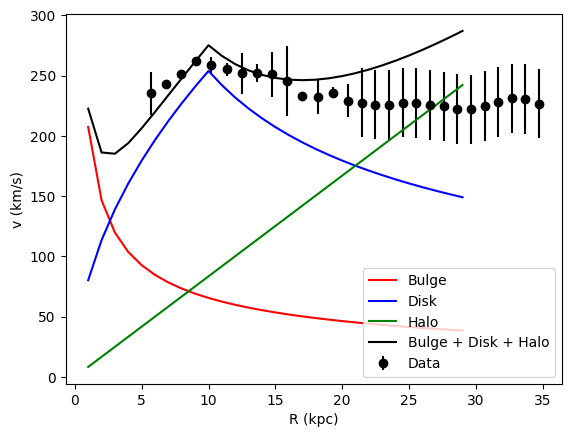

In [111]:
# Plot the data
plt.errorbar(tab["col2"], tab["col3"], yerr=tab["col4"], ecolor="black", color="black", fmt='o', label="Data")

# Overplot our calculations, basically copy and pater from the previous plotting coding cell
plt.plot(R_distance_from_bulge.to(u.kpc), V_orbital.to(u.km/u.s), color="red", label="Bulge") # plotting bulge
plt.plot(R_distance_from_bulge.to(u.kpc), v_disk_arr.to(u.km/u.s), color="blue", label="Disk") # plotting disk
plt.plot(R_distance_from_bulge.to(u.kpc), v_halo_arr.to(u.km/u.s), color="green", label="Halo") # plotting halo
plt.plot(R_distance_from_bulge.to(u.kpc), v_bulge_disk_halo_arr.to(u.km/u.s), color="black", label="Bulge + Disk + Halo") # plotting bulge + disk + halo components
plt.title('Orbital Velocity in the Milky Way Galaxy at Different Radii') # show the title of the graph
plt.xlabel('R (kpc)')
plt.ylabel('v (km/s)')
plt.legend() # to show the legend of a figure
plt.show()